The dataset is taken from a Coursera course.

# Package Imports

In [0]:
import pandas as pd #To work with Dataframe
import numpy as np #To carry out Vectorisation operations
import h5py #To read the data from a dataset of type H5
import matplotlib.pyplot as plt #To plot the Images

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

# Loading the dataset 

In [0]:
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [0]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [0]:
m_train = train_set_x_orig.shape[0] #To extract the shapes of the different arrays for our algorithm 
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

In [0]:
train_set_flattened = train_set_x_orig.reshape(209,-1).T #The command reshape(*,-1) will identify the appropriate shape,
#Here the pictures are in size 64*64 with 3 layers(R,G,B). Hence the feature vector should contain all the pixels, hence it is reshaped.

In [0]:
test_set_flattened = test_set_x_orig.reshape(50,-1).T #Reshaping the Test set

In [0]:
train_set_x = train_set_flattened/255
test_set_x = test_set_flattened/255 #The feature set is scaled down by dividing with the max color value.

# Model

In [0]:
def sigmoid(z): #Function for the Sigmoid calculation 
    s=(1/(1+np.exp(-z)))
    return s

In [0]:
def model(X,Y,learning_rate,iteration): #The Logistic Regression model
    
    m = X.shape[1] #The size of the Samples
    
    w = np.zeros((X.shape[0],1)) #Assigning the Weight matrix initial values to Zero
    
    b = 0 #Intercept
    
    for i in range(iteration): #Looping the process Iteration number of Times
        
        A = sigmoid(np.dot(w.T,X)+b)
        
        cost = (-1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
        
        if i%100 == 0:
            print('Cost after ',i,'iterartion - ',cost) #Printing the Cost after every 100 iterations.
            
        dw = (1/m)*np.dot(X,(A-Y).T) #Gradient Calculation, since the gradient for Sigmoid function is X((1/(1+e(-x)))-Y)
        
        db = (1/m)*np.sum(A-Y) #Since the value of X for intercept is 1, hence the gradient is the Summation over (1/(1+e(-x)))-Y
        
        w = w-learning_rate*dw
        
        b = b-learning_rate*db #Since Python Broadcast takes care of the Shape conversion.
    
    return w,b           

In [0]:
def predict(w, b, X): #To predict for the given set.
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        if A[0,i]>0.5: #Thresholding the value of Sigmoid to be above 0.5 to be Classified as Cat
            Y_prediction[0,i]=1
        else:
            Y_prediction[0,i]=0
            
    return Y_prediction

In [11]:
W , b = model(train_set_x,train_set_y,0.005,2000) #Fitting the model with the learning rate,iterations

Cost after  0 iterartion -  0.6931471805599453
Cost after  100 iterartion -  0.5845083636993086
Cost after  200 iterartion -  0.46694904094655476
Cost after  300 iterartion -  0.37600686694802077
Cost after  400 iterartion -  0.3314632893282512
Cost after  500 iterartion -  0.30327306747438293
Cost after  600 iterartion -  0.27987958658260487
Cost after  700 iterartion -  0.26004213692587574
Cost after  800 iterartion -  0.2429406846779662
Cost after  900 iterartion -  0.22800422256726063
Cost after  1000 iterartion -  0.21481951378449635
Cost after  1100 iterartion -  0.20307819060644985
Cost after  1200 iterartion -  0.19254427716706862
Cost after  1300 iterartion -  0.18303333796883503
Cost after  1400 iterartion -  0.17439859438448874
Cost after  1500 iterartion -  0.16652139705400335
Cost after  1600 iterartion -  0.15930451829756614
Cost after  1700 iterartion -  0.15266732471296504
Cost after  1800 iterartion -  0.1465422350398234
Cost after  1900 iterartion -  0.140872075703101

# Prediction and Performance Evaluation

In [0]:
yhat = predict(W,b,train_set_x) #Prediction for the train set for model perfomance over train set

In [13]:
print("train accuracy: {} %".format(100 - np.mean(np.abs(yhat - train_set_y)) * 100))

train accuracy: 99.04306220095694 %


In [0]:
yhat_test = predict(W,b,test_set_x) #Prediction for the test set

In [15]:
print("test accuracy: {} %".format(100 - np.mean(np.abs(yhat_test - test_set_y)) * 100)) #Test Set perfomance of the model

test accuracy: 70.0 %


# Testing for our own input

y = 0.0  non-cat


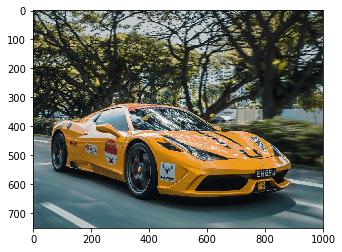

In [16]:
import skimage.transform as skt #Using the model for our own image.

my_image = "car.jpg" 
fname = my_image
image = plt.imread(fname)
image = image/255.
my_image = skt.resize(image,(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(W,b, my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) +"  "+classes[int(np.squeeze(my_predicted_image)),].decode("utf-8"))